In [51]:
import os, shutil

# original_dataset_dir = 'dataset'

In [52]:
base_dir = 'cats_and_dogs_small'
# os.mkdir(base_dir)

In [53]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

In [54]:
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)


In [55]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(200)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)
    

In [56]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(200)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode = 'grayscale',
    target_size = (100, 100),
    batch_size = 200,
    class_mode = 'binary'
)

Found 400 images belonging to 2 classes.


In [58]:
type(train_generator)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [59]:
training_data, training_labels = next(train_generator)

In [60]:
print('data batch shape = ', training_data.shape)
print('labels batch shape = ', training_labels.shape)

data batch shape =  (200, 100, 100, 1)
labels batch shape =  (200,)


In [61]:
import matplotlib.pyplot as plt

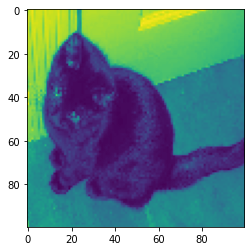

In [62]:
plt.imshow(training_data[1])

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [64]:
model = Sequential()

In [65]:
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,1)))
model.add(MaxPooling2D((2,2)))
          
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
          
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

In [66]:
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [68]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [69]:
history = model.fit(training_data, training_labels, validation_split = 0.2, epochs = 30)

Train on 160 samples, validate on 40 samples
Epoch 1/30
160/160 [==============================] - 2s 15ms/sample - loss: 0.7907 - acc: 0.5375 - val_loss: 0.6922 - val_acc: 0.5250
Epoch 2/30
160/160 [==============================] - 2s 11ms/sample - loss: 0.6949 - acc: 0.4125 - val_loss: 0.6931 - val_acc: 0.4750
Epoch 3/30
160/160 [==============================] - 2s 11ms/sample - loss: 0.6934 - acc: 0.5375 - val_loss: 0.6928 - val_acc: 0.5250
Epoch 4/30
160/160 [==============================] - 2s 11ms/sample - loss: 0.6927 - acc: 0.5375 - val_loss: 0.6927 - val_acc: 0.5250
Epoch 5/30
160/160 [==============================] - 2s 10ms/sample - loss: 0.6925 - acc: 0.5250 - val_loss: 0.6923 - val_acc: 0.5250
Epoch 6/30
160/160 [==============================] - 2s 12ms/sample - loss: 0.6904 - acc: 0.5250 - val_loss: 0.6921 - val_acc: 0.5250
Epoch 7/30
160/160 [==============================] - 2s 13ms/sample - loss: 0.6885 - acc: 0.5250 - val_loss: 0.6912 - val_acc: 0.5250
Epoch 8/30

In [70]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [71]:
epochs = range(len(acc))

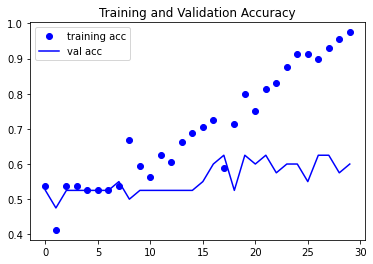

In [72]:
plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'val acc')
plt.title('Training and Validation Accuracy')
plt.legend()

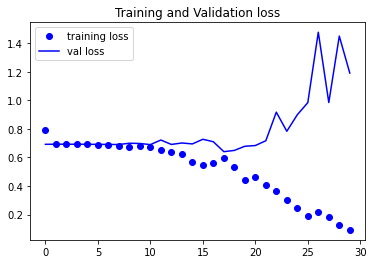

In [73]:
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'val loss')
plt.title('Training and Validation loss')
plt.legend()




predicted class 1



labels {'cats': 0, 'dogs': 1}


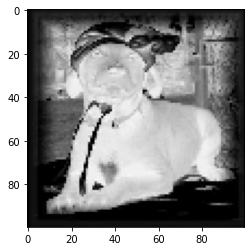

In [74]:
index = 66
test_image = training_data[index]
prediction = model.predict_classes([[test_image]])
predicted_class = prediction[0][0]
print('\n\n')
print('predicted class', predicted_class)
print('\n\n')
print('labels', train_generator.class_indices)

plt.imshow(training_data[index][:,:,0], cmap = plt.cm.binary)

In [75]:
from tensorflow.keras.applications import vgg16

In [76]:
vgg16_model = vgg16.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (100, 100, 3),
    classes = 1
)

In [77]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [78]:
# vgg16_model.layers
model = Sequential()

for layer in vgg16_model.layers:
    layer.trainable= False
    model.add(layer)
    

In [79]:
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 25, 25, 256)      

In [81]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [83]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [84]:
train_generator = train_datagen.flow_from_directory (
    train_dir,
    color_mode = 'rgb',
    target_size = (100, 100),
    batch_size = 200,
    class_mode = 'binary'
)

Found 400 images belonging to 2 classes.


In [85]:
training_data, training_labels = next(train_generator)

In [86]:
history = model.fit(training_data,training_labels, validation_split = 0.2, epochs = 15)

Train on 160 samples, validate on 40 samples
Epoch 1/15
160/160 [==============================] - 9s 53ms/sample - loss: 1.2211 - acc: 0.5750 - val_loss: 1.1678 - val_acc: 0.6000
Epoch 2/15
160/160 [==============================] - 8s 48ms/sample - loss: 0.6331 - acc: 0.7125 - val_loss: 0.7699 - val_acc: 0.6500
Epoch 3/15
160/160 [==============================] - 6s 39ms/sample - loss: 0.3253 - acc: 0.8687 - val_loss: 0.5801 - val_acc: 0.6750
Epoch 4/15
160/160 [==============================] - 6s 35ms/sample - loss: 0.2419 - acc: 0.9187 - val_loss: 0.5856 - val_acc: 0.7000
Epoch 5/15
160/160 [==============================] - 6s 36ms/sample - loss: 0.2177 - acc: 0.9187 - val_loss: 0.5230 - val_acc: 0.7500
Epoch 6/15
160/160 [==============================] - 6s 37ms/sample - loss: 0.1257 - acc: 0.9563 - val_loss: 0.5952 - val_acc: 0.7250
Epoch 7/15
160/160 [==============================] - 6s 35ms/sample - loss: 0.0984 - acc: 0.9750 - val_loss: 0.5300 - val_acc: 0.7750
Epoch 8/15

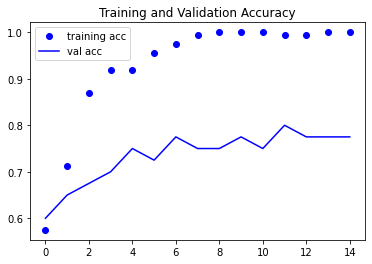

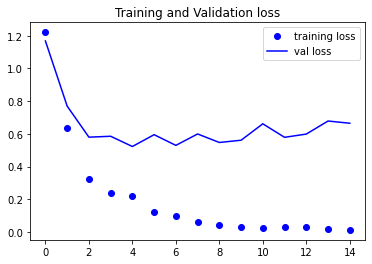

In [87]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'val acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'val loss')
plt.title('Training and Validation loss')
plt.legend()




predicted class 0



labels {'cats': 0, 'dogs': 1}


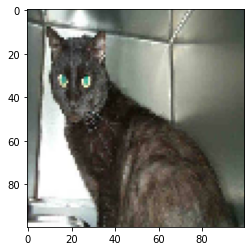

In [94]:
index = 12
test_image = training_data[index]
prediction = model.predict_classes([[test_image]])
predicted_class = prediction[0][0]
print('\n\n')
print('predicted class', predicted_class)
print('\n\n')
print('labels', train_generator.class_indices)

plt.imshow(training_data[index])